<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/MultiClass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-16 15:52:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 209.85.145.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   224MB/s    in 2.2s    

2022-05-16 15:52:44 (224 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images is '{dirpath}'")

There are 2 directories and 0 images is '10_food_classes_all_data'
There are 10 directories and 0 images is '10_food_classes_all_data/test'
There are 0 directories and 250 images is '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images is '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images is '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images is '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images is '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images is '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images is '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images is '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images is '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images is '10_food_classes_all_data/test/chicken_curry'
There are 10 directori

In [ ]:
train_dir= "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


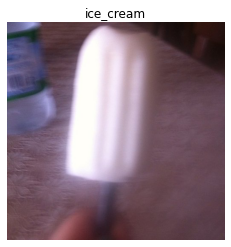

In [ ]:
import random
img=random_img(target_dir=train_dir,target_class=random.choice(class_names))


#preprocess data 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen  =ImageDataGenerator(rescale=1/255.) 
test_datagen  =ImageDataGenerator(rescale=1/255.) 
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32 ,class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32 ,class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#create a model

In [ ]:
import tensorflow as tf

In [ ]:
model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3))   ,         
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 226ms/step - loss: 2.1649 - accuracy: 0.1980 - val_loss: 2.0240 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.9406 - accuracy: 0.3203 - val_loss: 1.9129 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.7951 - accuracy: 0.3839 - val_loss: 1.8518 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 51s 218ms/step - loss: 1.6311 - accuracy: 0.4472 - val_loss: 1.8447 - val_accuracy: 0.3592
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 1.4463 - accuracy: 0.5119 - val_loss: 1.9682 - val_accuracy: 0.3380


In [ ]:
model1.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.9682 - accuracy: 0.3380


[1.968216061592102, 0.33799999952316284]

it look likes our model its just guessing




In [ ]:
def plot_loss_curvse(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_valss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # plot accuracy 
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

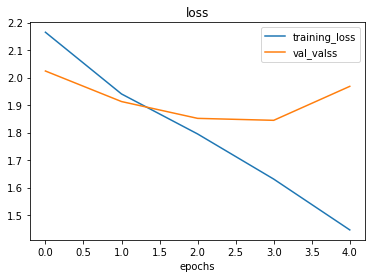

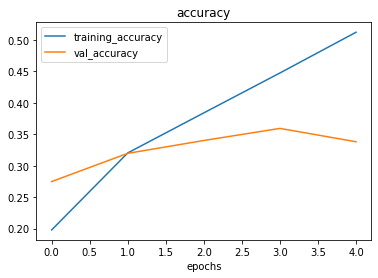

In [ ]:
plot_loss_curvse(history1)

our model is overfitting the data because the learning accuracy is way higher than evaluating accuracy, so  we need reduce it 

In [ ]:
model1.summary()
#our model has a lot of params to let try to decrease them by removing 1 layer

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
model2=tf.keras.Sequential([
tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation="softmax")
])

model2.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 234ms/step - loss: 2.1142 - accuracy: 0.2348 - val_loss: 1.9528 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.7495 - accuracy: 0.4073 - val_loss: 1.8817 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 52s 219ms/step - loss: 1.3314 - accuracy: 0.5727 - val_loss: 1.9495 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 52s 219ms/step - loss: 0.8687 - accuracy: 0.7324 - val_loss: 2.2171 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 52s 219ms/step - loss: 0.4984 - accuracy: 0.8615 - val_loss: 2.7698 - val_accuracy: 0.2964


it seems that our model even got worse :)
try new model with augmented data 

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2
                                           ,zoom_range=0.2,horizontal_flip=True)
train_datagen_augmented=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")  

Found 7500 images belonging to 10 classes.


In [ ]:
# create a new model with augmented data
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history3=model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data , validation_steps=(len(test_data)))

Epoch 1/5
235/235 [==============================] - 53s 223ms/step - loss: 2.2128 - accuracy: 0.2233 - val_loss: 1.9765 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 58s 248ms/step - loss: 1.8195 - accuracy: 0.3712 - val_loss: 2.0514 - val_accuracy: 0.2908
Epoch 3/5
235/235 [==============================] - 51s 219ms/step - loss: 1.4804 - accuracy: 0.5173 - val_loss: 1.9611 - val_accuracy: 0.3104
Epoch 4/5
235/235 [==============================] - 52s 222ms/step - loss: 1.0425 - accuracy: 0.6720 - val_loss: 2.2202 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 0.6475 - accuracy: 0.8063 - val_loss: 2.5683 - val_accuracy: 0.2832


our model is still awful :D

In [ ]:
model3.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 2.5683 - accuracy: 0.2832


[2.568260431289673, 0.2831999957561493]

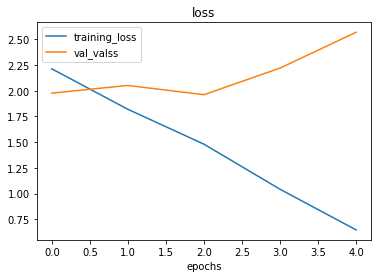

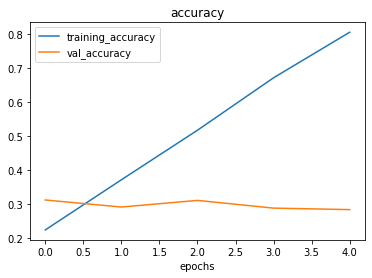

In [ ]:
plot_loss_curvse(history3)

In [ ]:
model4=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(224,224,3))   ,         
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation="softmax")
])
model4.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history4=model4.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 71s 296ms/step - loss: 2.1024 - accuracy: 0.2391 - val_loss: 1.9070 - val_accuracy: 0.3292
Epoch 2/10
235/235 [==============================] - 60s 255ms/step - loss: 1.8557 - accuracy: 0.3553 - val_loss: 1.8545 - val_accuracy: 0.3520
Epoch 3/10
235/235 [==============================] - 62s 262ms/step - loss: 1.6995 - accuracy: 0.4216 - val_loss: 1.7975 - val_accuracy: 0.3724
Epoch 4/10
235/235 [==============================] - 55s 236ms/step - loss: 1.4507 - accuracy: 0.5153 - val_loss: 1.9195 - val_accuracy: 0.3576
Epoch 5/10
235/235 [==============================] - 57s 240ms/step - loss: 1.0805 - accuracy: 0.6399 - val_loss: 2.1430 - val_accuracy: 0.3536
Epoch 6/10
235/235 [==============================] - 57s 241ms/step - loss: 0.6785 - accuracy: 0.7837 - val_loss: 2.5433 - val_accuracy: 0.3448
Epoch 7/10
235/235 [==============================] - 67s 284ms/step - loss: 0.3837 - accuracy: 0.8789 - val_loss: 3.4366 - val_ac

In [ ]:
model4.evaluate(test_data)

79/79 [==============================] - 13s 168ms/step - loss: 5.5611 - accuracy: 0.3252


[5.561148643493652, 0.32519999146461487]

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# try with augmented data 
model5=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(224,224,3) , )   ,         
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation="softmax")
])
model5.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history4=model5.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 132s 561ms/step - loss: 2.1968 - accuracy: 0.1916 - val_loss: 2.0298 - val_accuracy: 0.2732
Epoch 2/10
235/235 [==============================] - 132s 562ms/step - loss: 2.1009 - accuracy: 0.2435 - val_loss: 2.0204 - val_accuracy: 0.2888
Epoch 3/10
235/235 [==============================] - 131s 557ms/step - loss: 2.0237 - accuracy: 0.2877 - val_loss: 1.8493 - val_accuracy: 0.3584
Epoch 4/10
235/235 [==============================] - 131s 556ms/step - loss: 1.9594 - accuracy: 0.3164 - val_loss: 1.8440 - val_accuracy: 0.3648
Epoch 5/10
235/235 [==============================] - 130s 554ms/step - loss: 1.9118 - accuracy: 0.3396 - val_loss: 1.7305 - val_accuracy: 0.4112
Epoch 6/10
235/235 [==============================] - 130s 553ms/step - loss: 1.8681 - accuracy: 0.3631 - val_loss: 1.6763 - val_accuracy: 0.4416
Epoch 7/10
235/235 [==============================] - 130s 552ms/step - loss: 1.8257 - accuracy: 0.3824 - val_loss: 1.6873 -

our model got better lets try with more epochs and layers

In [ ]:
# try with augmented data 
model6=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(224,224,3))   ,         
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10,activation="softmax")
])
model6.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history6=model6.fit(train_data_augmented,epochs=20,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 132s 561ms/step - loss: 2.2082 - accuracy: 0.1771 - val_loss: 2.0996 - val_accuracy: 0.2092
Epoch 2/20
235/235 [==============================] - 130s 552ms/step - loss: 2.0795 - accuracy: 0.2540 - val_loss: 1.9146 - val_accuracy: 0.3212
Epoch 3/20
235/235 [==============================] - 130s 554ms/step - loss: 2.0033 - accuracy: 0.2968 - val_loss: 1.8126 - val_accuracy: 0.3652
Epoch 4/20
235/235 [==============================] - 130s 554ms/step - loss: 1.9597 - accuracy: 0.3209 - val_loss: 1.8423 - val_accuracy: 0.3632
Epoch 5/20
235/235 [==============================] - 130s 554ms/step - loss: 1.8907 - accuracy: 0.3451 - val_loss: 1.6982 - val_accuracy: 0.4276
Epoch 6/20
235/235 [==============================] - 130s 552ms/step - loss: 1.8377 - accuracy: 0.3660 - val_loss: 1.6433 - val_accuracy: 0.4436
Epoch 7/20
235/235 [==============================] - 130s 554ms/step - loss: 1.7857 - accuracy: 0.3863 - val_loss: 1.5926 -

In [ ]:
# try with augmented data and another Dense layer
model7=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(224,224,3))   ,         
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")
])
model7.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history7=model7.fit(train_data_augmented,epochs=20,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 133s 562ms/step - loss: 2.2185 - accuracy: 0.1747 - val_loss: 2.1526 - val_accuracy: 0.2296
Epoch 2/20
235/235 [==============================] - 130s 555ms/step - loss: 2.1239 - accuracy: 0.2275 - val_loss: 1.9925 - val_accuracy: 0.2892
Epoch 3/20
235/235 [==============================] - 131s 558ms/step - loss: 2.0540 - accuracy: 0.2764 - val_loss: 1.9303 - val_accuracy: 0.3212
Epoch 4/20
206/235 [=========================>....] - ETA: 14s - loss: 2.0209 - accuracy: 0.2866

KeyboardInterrupt: ignored

In [ ]:
# create function to plot image and class names 
def predict_plot(model,filename,class_names=class_names):
  img= prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0] >1 ):
    pred_class=class_names[tf.argmax(pred[0])]
  else : 
       pred_class=class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False)
  